In [5]:
%cd "~/pln-brca-xp/notebooks"
%load_ext autoreload
%autoreload 2

/home/xabush/pln-brca-xp/notebooks
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from utils_emb import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.manifold import TSNE

In [11]:
st_df = pd.read_csv("/var/www/datasets/embedding_vector_state_and_outcome.csv", index_col="patient_ID")
tamoxifen_studies_v2 = ["GSE12093",  "GSE1379", "GSE17705", "GSE9893"]
st_tamx_df = st_df[st_df["series_id"].isin(tamoxifen_studies_v2)]

In [12]:
st_tamx_df["series_id"].value_counts()

GSE17705    298
GSE9893     155
GSE12093    136
GSE1379      60
Name: series_id, dtype: int64

In [13]:

X_train, X_test = pd.read_table("/var/www/datasets/embedding-vectors/tamoxifen_group/property_vector_100genes_ge_pln_TRAIN_2021-03-25.csv", index_col="patient_ID"), pd.read_table("/var/www/datasets/embedding-vectors/tamoxifen_group/property_vector_100genes_ge_pln_TEST_2012-03-25.csv", index_col="patient_ID")

In [7]:
X_train

,GO:0040017_overexp,GO:0021953_overexp,R-HSA-5358751_overexp,GO:0030334_overexp,GO:0008970_underexp,GO:0035627_underexp,GO:0045859_overexp,GO:0015698_underexp,GO:0034650_overexp,GO:0005891_underexp,...,R-HSA-4839726_underexp,GO:0002688_overexp,GO:0051099_underexp,GO:0036302_underexp,R-HSA-162599_overexp,GO:0032273_underexp,GO:0006959_overexp,GO:0034032_underexp,GO:0030178_overexp,R-HSA-8943724_overexp
patient_ID,,,,,,,,,,,,,,,,,,,,,
249600,0.000863,0.000000,0.000321,0.000766,0.000000,0.000000,0.000288,0.000000,0.000657,0.000000,...,0.000000,0.000000,0.000000,0.000522,0.000422,0.000842,0.000512,0.000109,0.000000,0.000218
441891,0.001481,0.000000,0.000000,0.000810,0.000480,0.000563,0.000813,0.000000,0.000000,0.000000,...,0.000228,0.000955,0.000990,0.000000,0.000000,0.000000,0.000000,0.000000,0.000054,0.000000
249532,0.000000,0.000000,0.000562,0.000000,0.000000,0.000000,0.000099,0.001043,0.000000,0.000764,...,0.000000,0.000078,0.000615,0.000635,0.000297,0.000644,0.000509,0.000000,0.000892,0.000214
22476,0.000681,0.000631,0.000000,0.000618,0.000000,0.000280,0.000000,0.000121,0.000634,0.000000,...,0.000000,0.000001,0.000000,0.000381,0.000281,0.000000,0.000516,0.000000,0.000000,0.000984
305173,0.000000,0.000000,0.000540,0.000000,0.000000,0.000543,0.000424,0.000856,0.000336,0.000000,...,0.000206,0.000000,0.000000,0.000593,0.000576,0.000631,0.000000,0.000118,0.000620,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000254,0.000692,0.000703,0.000742,0.000000,...,0.000000,0.000000,0.000329,0.000234,0.000000,0.000632,0.000000,0.000000,0.000000,0.000064
249669,0.000000,0.000663,0.000453,0.000117,0.000768,0.000375,0.000000,0.000000,0.000631,0.000000,...,0.000000,0.000000,0.000312,0.000445,0.000000,0.000000,0.000507,0.000178,0.000930,0.001128
305255,0.000044,0.000000,0.000000,0.000000,0.000757,0.000526,0.000983,0.000585,0.000000,0.000760,...,0.000206,0.000844,0.000342,0.000000,0.000000,0.000631,0.000000,0.000114,0.000061,0.000000


In [14]:
X_all_train_kpca, X_all_test_kpca, kpca_all = do_emb(X_train, X_test, ker=tanimoto_v2)
X_all_train_kpca, X_all_test_kpca = pd.DataFrame(X_all_train_kpca, index=X_train.index), pd.DataFrame(X_all_test_kpca, index=X_test.index)
X_all_train_kpca_df, X_all_test_kpca_df = pd.merge(X_all_train_kpca, st_tamx_df.loc[:,["posOutcome", "series_id"]], left_index=True, right_index=True), pd.merge(X_all_test_kpca, st_tamx_df.loc[:,["posOutcome", "series_id"]], left_index=True, right_index=True)

2.5816814192276797e-33
0.001522027675451697


<AxesSubplot:xlabel='0', ylabel='1'>

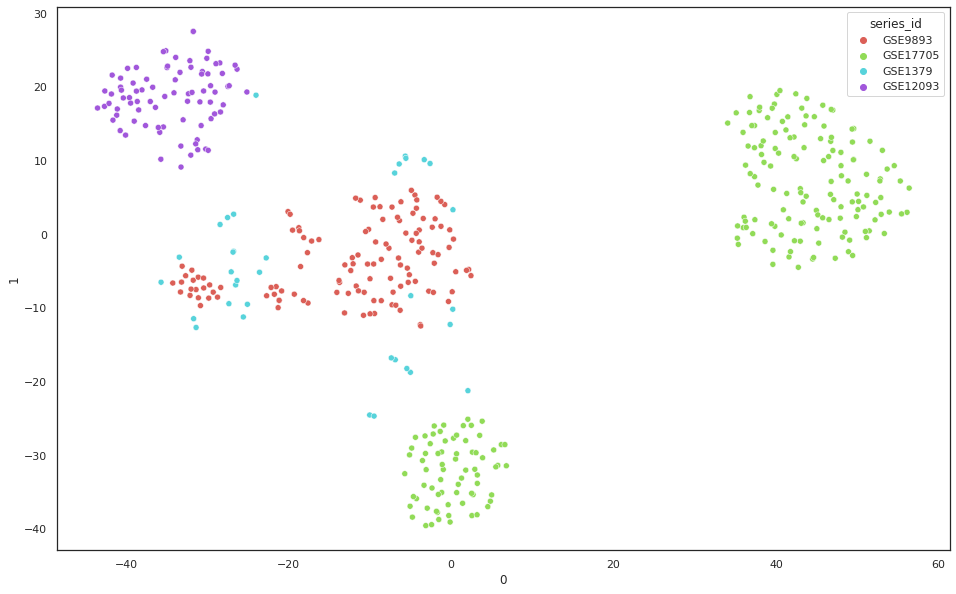

In [26]:
sns.set(rc={"figure.figsize" : (16, 10)})
sns.set_style("white")
tsne_out = TSNE(n_components=2, perplexity=20, init="pca").fit_transform(X_all_train_kpca)
tsne_out_df = pd.DataFrame(tsne_out, index=X_all_train_kpca.index)
tsne_out_df = tsne_out_df.join(X_all_train_kpca_df["series_id"])
tsne_out_df = tsne_out_df.join(st_tamx_df["posOutcome"])
sns.scatterplot(data=tsne_out_df, x=0, y=1, hue="series_id", palette=sns.hls_palette(4))

In [10]:
train_embs, test_embs = {}, {}

for i in tamoxifen_studies_v2:
    print(i)
    study_df = st_tamx_df[st_tamx_df["series_id"] == i]
    # X_train_st, X_test_st = X_train.loc[study_df.index,:], X_test.loc[study_df.index,:]
    X_train_st, X_test_st = pd.merge(X_train, study_df["posOutcome"], left_index=True, right_index=True), pd.merge(X_test, study_df["posOutcome"], left_index=True, right_index=True)
    X_train_kpca, X_test_kpca, _ = do_emb(X_train_st.drop(["posOutcome"], axis=1), X_test_st.drop(["posOutcome"], axis=1))

    X_train_kpca_df, X_test_kpca_df = pd.DataFrame(X_train_kpca, index=X_train_st.index), pd.DataFrame(X_test_kpca, index=X_test_st.index)
    X_train_kpca_df, X_test_kpca_df = pd.merge(X_train_kpca_df, study_df["posOutcome"], left_index=True, right_index=True), pd.merge(X_test_kpca_df, study_df["posOutcome"], left_index=True, right_index=True)
    train_embs[i], test_embs[i] = X_train_kpca_df, X_test_kpca_df

GSE12093
3.925164191553157e-34
0.0014218457992947152
GSE1379
2.8508088078630166e-34
0.0023881752713369345
GSE17705
6.665908479250657e-34
0.0010635964936902417
GSE9893
5.910530001470101e-34
0.0015372988521495815


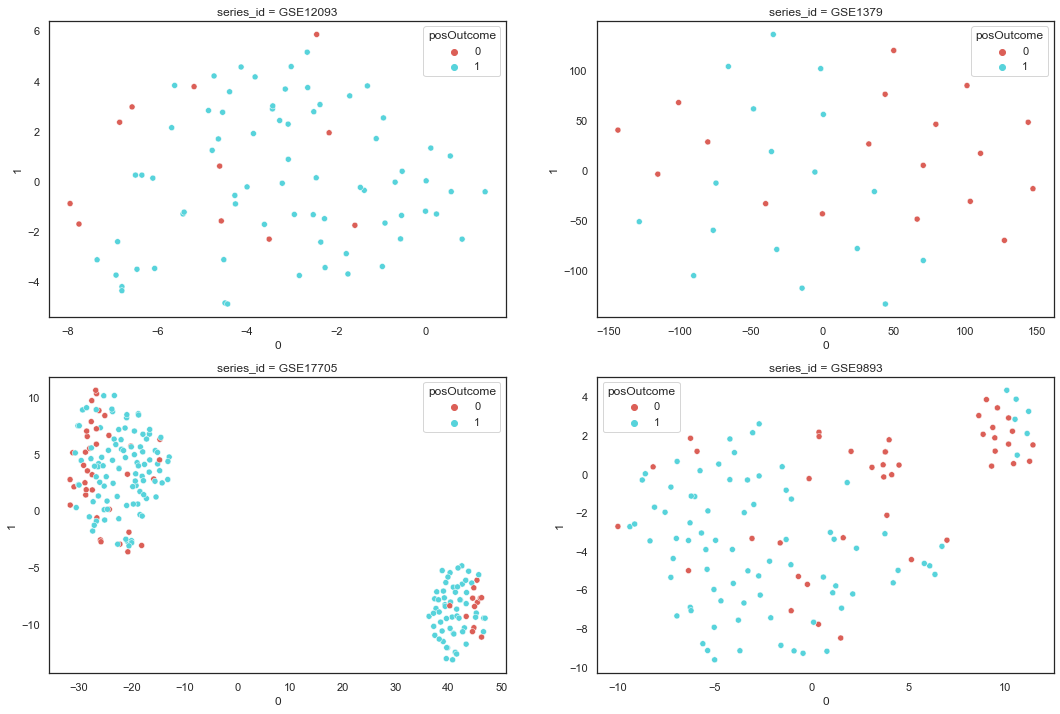

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
axs = axs.ravel()
for i, k in enumerate(train_embs):
    X = train_embs[k].drop(["posOutcome"], axis=1)
    tsne_out = TSNE(n_components=2, perplexity=30, n_iter=5000).fit_transform(X)
    tsne_out_df = pd.DataFrame(tsne_out, index=X.index)
    tsne_out_df = tsne_out_df.join(train_embs[k]["posOutcome"])
    axs[i].set_title("series_id = {0}".format(k))
    sns.scatterplot(data=tsne_out_df, x=0, y=1, hue="posOutcome", palette=sns.hls_palette(2), ax=axs[i])

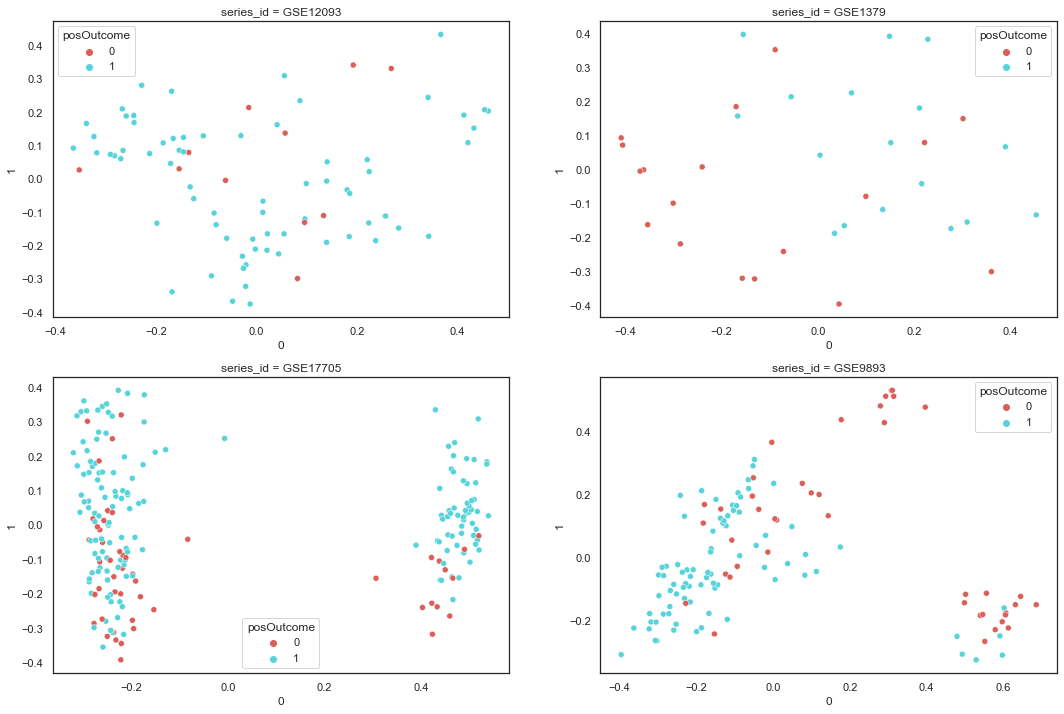

In [17]:
from sklearn.manifold import TSNE
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
axs = axs.ravel()
for i, k in enumerate(train_embs):
    X = train_embs[k]
    axs[i].set_title("series_id = {0}".format(k))
    sns.scatterplot(data=X, x=0, y=1, hue="posOutcome", palette=sns.hls_palette(2), ax=axs[i])

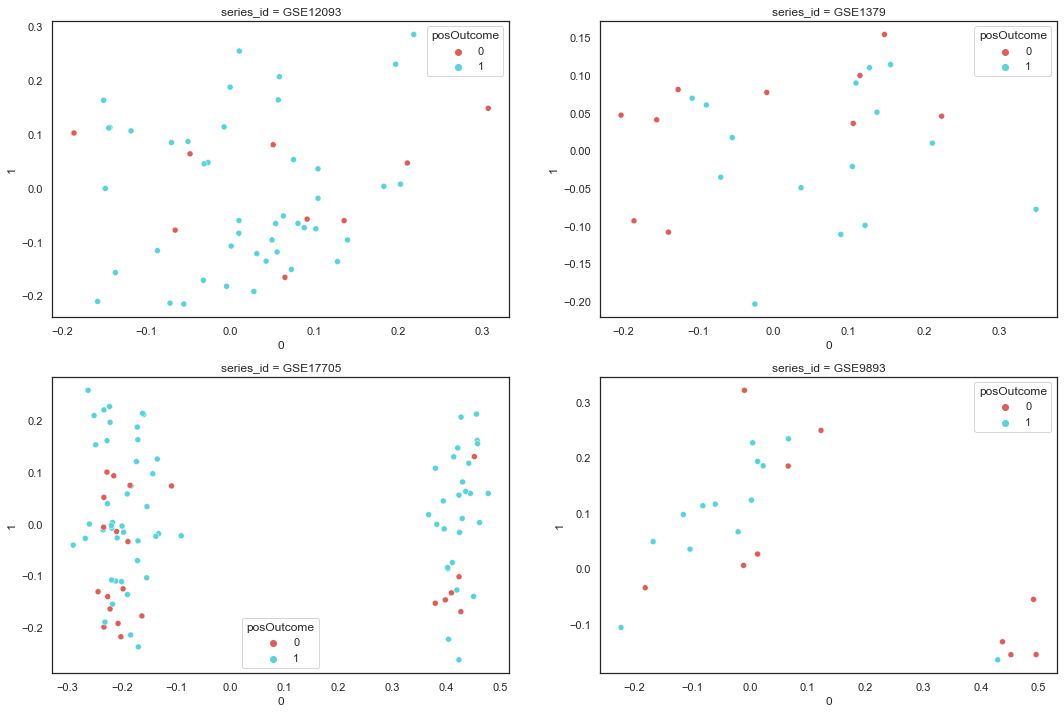

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
axs = axs.ravel()
for i, k in enumerate(test_embs):
    axs[i].set_title("series_id = {0}".format(k))
    sns.scatterplot(data=test_embs[k], x=0, y=1, hue="posOutcome", palette=sns.hls_palette(2), ax=axs[i])

In [20]:
cols = X_train.columns.tolist()

Text(90, 0.03, 'Elbow at n_components = 11')

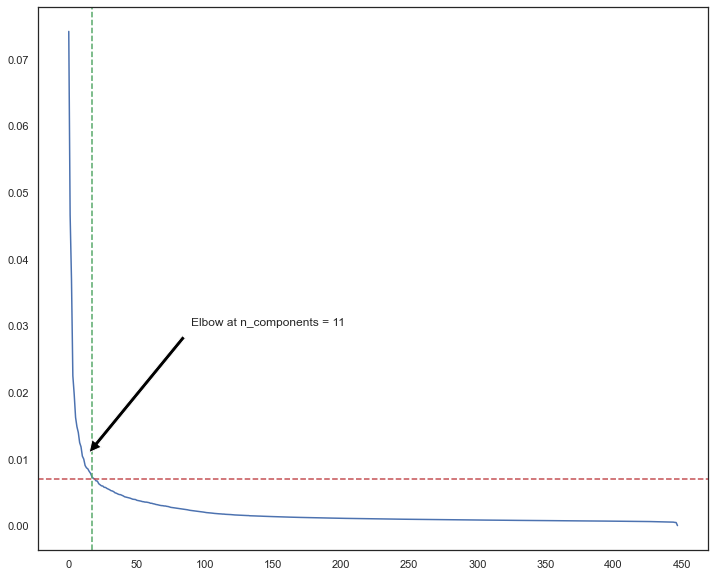

In [25]:
from matplotlib.ticker import MaxNLocator
lambdas_sum = np.sum(kpca_all.lambdas_)

n_components = range(0, len(kpca_all.lambdas_))

var_diff = []
for i in n_components:
    var_diff.append((kpca_all.lambdas_[i] / lambdas_sum))


var_diff = np.array(var_diff)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax.get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=8))
ax.get_yaxis()
ax.plot(n_components, var_diff)
ax.axhline(y=0.007, color='r', linestyle='--')
ax.axvline(x=17, color='g', linestyle='--')
elbow = np.argwhere(np.diff(np.sign(0.01 - var_diff))).flatten()

ax.annotate("Elbow at n_components = {0}".format(elbow[0]), xy=(elbow[0], 0.01), xycoords='data', xytext=(90, 0.03), textcoords='data',
            arrowprops={'facecolor':'black', 'shrink':0.05})

In [22]:
scaled_bases = np.sqrt(kpca_all.lambdas_) * kpca_all.alphas_
X_transform = kpca_all.transform(X_train)

In [23]:
X_transform.shape

(449, 448)

In [24]:
n_comp = range(0, elbow[0])
pcs = scaled_bases[:,n_comp]
w_mat, err, rank, s = np.linalg.lstsq(X_train, pcs, rcond=None)
print(rank)

449


In [26]:
w_mat_df = pd.DataFrame(w_mat, index=cols)
w_mat_df

,0,1,2,3,4,5,6,7,8,9,10
GO:0040017_overexp,-0.025862,0.196485,-0.096883,-0.171838,-0.696533,0.185797,0.541728,0.185684,0.505238,-0.509375,-0.061267
GO:0021953_overexp,-0.000045,-0.000037,0.000014,-0.000003,0.000003,-0.000007,-0.000006,-0.000008,-0.000013,-0.000009,-0.000007
R-HSA-5358751_overexp,0.000016,0.000011,0.000047,0.000027,-0.000007,0.000014,-0.000006,0.000007,0.000035,-0.000014,0.000017
GO:0030334_overexp,-0.108230,0.314544,0.630467,0.622577,-1.937645,1.294189,0.501032,0.208988,1.204951,0.190389,-0.733409
GO:0008970_underexp,0.000016,-0.000005,-0.000002,0.000041,-0.000026,0.000036,0.000026,-0.000002,-0.000017,-0.000024,-0.000039
...,...,...,...,...,...,...,...,...,...,...,...
GO:0032273_underexp,-0.000041,0.000002,0.000001,-0.000016,-0.000010,0.000007,0.000008,0.000024,0.000018,0.000032,-0.000001
GO:0006959_overexp,0.000007,-0.000179,0.000583,-0.000500,0.001142,-0.000236,0.000673,-0.000421,-0.000740,0.000222,0.000263
GO:0034032_underexp,-0.145223,-0.180899,-0.159754,-0.427464,0.221181,-0.456939,-0.323686,0.006170,0.046973,0.461537,-0.339933
GO:0030178_overexp,0.163768,0.646590,-0.343603,0.782880,-0.001867,0.591960,0.172226,-0.013547,0.336058,-0.423544,-0.125531


In [27]:
weight_sum = w_mat_df.abs().sum(axis=1)
weight_sum.sort_values(ascending=False).head(10)

GO:0005516_underexp    15.115502
GO:0005509_underexp    15.055866
GO:0032886_underexp    15.026665
GO:0016301_underexp    14.214116
GO:0062013_underexp    13.429102
GO:0062023_overexp     13.335330
GO:0048598_underexp    13.162320
GO:0016301_overexp     13.065769
GO:0007154_overexp     12.872006
GO:0031032_overexp     12.317203
dtype: float64

In [30]:
top_100_cats = weight_sum.sort_values(ascending=False).head(100)

In [31]:
with open("datasets/100_pln_gen_go_pathway.txt", "w") as fp:
    for x in top_100_cats.index:
        fp.write("{0}\n".format(x))

In [32]:
X_ppt_diff_tr, X_ppt_diff_te = pd.read_table("/var/www/datasets/property_vector_Train_2021-04-02.csv", index_col="patient_ID"), pd.read_table("/var/www/datasets/property_vector_Test_2021-04-02.csv", index_col="patient_ID")
print(X_ppt_diff_tr.shape)
y_ppt_diff_tr, y_ppt_diff_te = X_ppt_diff_tr.join(st_tamx_df["posOutcome"])["posOutcome"], X_ppt_diff_te.join(st_tamx_df["posOutcome"])["posOutcome"]

(449, 3740)


In [33]:
cols_dff = X_ppt_diff_tr.columns.tolist()

In [56]:
X_diff_train_kpca, X_diff_test_kpca, kpca_diff = do_emb(X_ppt_diff_tr, X_ppt_diff_te, ker=tanimoto_v2)
X_diff_train_kpca, X_diff_test_kpca = pd.DataFrame(X_diff_train_kpca, index=X_ppt_diff_tr.index), pd.DataFrame(X_diff_test_kpca, index=X_ppt_diff_te.index)
X_diff_train_kpca_df, X_diff_test_kpca_df = pd.merge(X_diff_train_kpca, st_tamx_df.loc[:,["posOutcome", "series_id"]], left_index=True, right_index=True), pd.merge(X_diff_test_kpca, st_tamx_df.loc[:,["posOutcome", "series_id"]], left_index=True, right_index=True)

<AxesSubplot:xlabel='0', ylabel='1'>

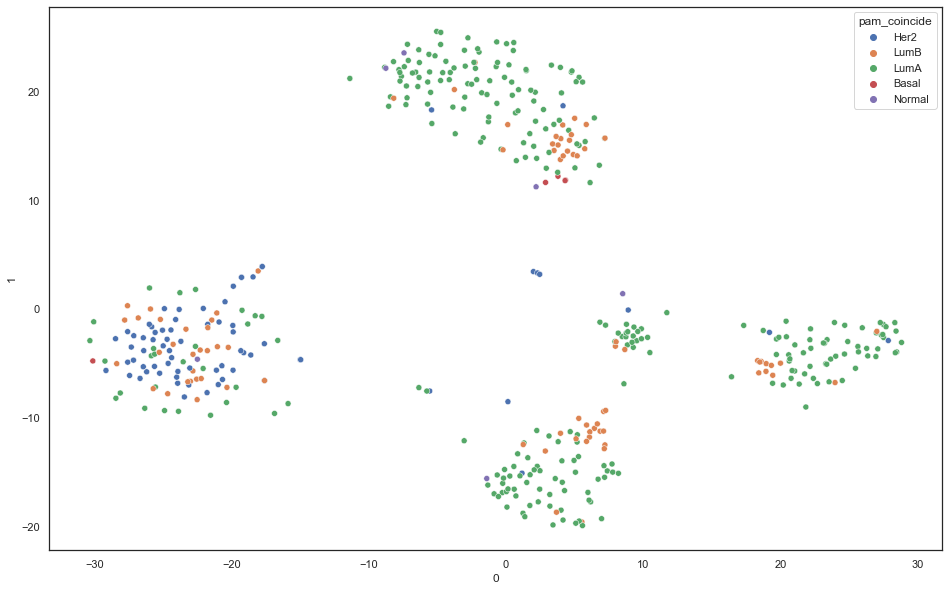

In [53]:
sns.set(rc={"figure.figsize" : (16, 10)})
sns.set_style("white")
tsne_out = TSNE(n_components=2, perplexity=30, init="pca").fit_transform(X_diff_train_kpca)
tsne_out_df = pd.DataFrame(tsne_out, index=X_diff_train_kpca.index)
tsne_out_df = tsne_out_df.join(st_tamx_df["pam_coincide"])
tsne_out_df = tsne_out_df.join(st_tamx_df["posOutcome"])
sns.scatterplot(data=tsne_out_df, x=0, y=1, hue="pam_coincide")

Text(90, 0.03, 'Elbow at n_components = 8')

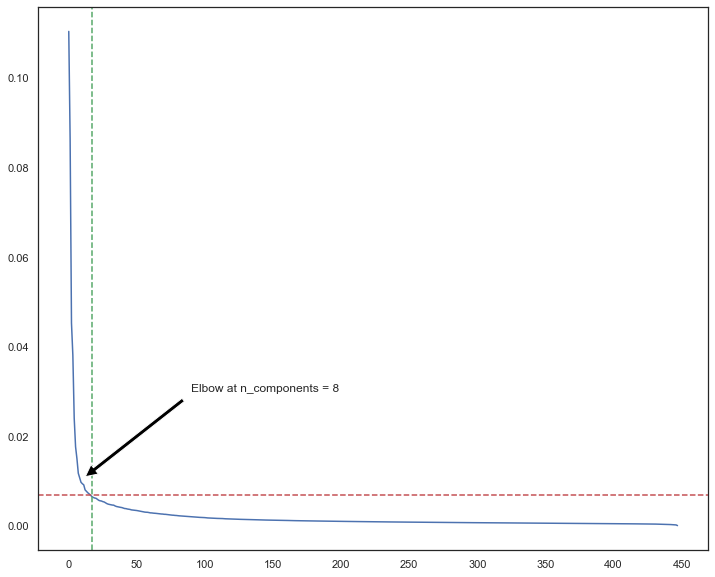

In [57]:
from matplotlib.ticker import MaxNLocator
lambdas_sum = np.sum(kpca_diff.lambdas_)

n_components = range(0, len(kpca_diff.lambdas_))

var_diff = []
for i in n_components:
    var_diff.append((kpca_diff.lambdas_[i] / lambdas_sum))


var_diff = np.array(var_diff)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax.get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=8))
ax.get_yaxis()
ax.plot(n_components, var_diff)
ax.axhline(y=0.007, color='r', linestyle='--')
ax.axvline(x=17, color='g', linestyle='--')
elbow = np.argwhere(np.diff(np.sign(0.01 - var_diff))).flatten()

ax.annotate("Elbow at n_components = {0}".format(elbow[0]), xy=(elbow[0], 0.01), xycoords='data', xytext=(90, 0.03), textcoords='data',
            arrowprops={'facecolor':'black', 'shrink':0.05})

In [55]:
n_comp = range(0, elbow[0])
pcs = scaled_bases[:,n_comp]
w_mat_diff, err, rank, s = np.linalg.lstsq(X_ppt_diff_tr, pcs, rcond=None)
print(rank)

449


In [50]:
w_mat_diff_df = pd.DataFrame(w_mat_diff, index=cols_dff)
w_mat_diff_df

,0,1,2,3,4,5,6,7
GO:0040017_overexp,-17.119749,-19.345654,12.412022,9.189378,-3.134080,8.063627,-13.897926,0.295402
GO:0051953_overexp,40.379412,8.893504,-28.711846,8.357607,2.622876,-0.259893,-10.741201,2.106250
R-HSA-5358751_overexp,0.000256,-0.001329,-0.000758,-0.000011,-0.000617,0.000055,-0.000434,-0.000001
GO:0015136_overexp,-0.001306,0.001009,0.000205,-0.000755,0.001124,-0.000416,-0.000059,-0.002568
R-HSA-1592230_overexp,2.919758,-4.910241,0.440048,-1.973437,0.254742,1.765045,-1.067320,7.918784
...,...,...,...,...,...,...,...,...
GO:0044238_overexp,-7.889429,2.163288,21.869490,-0.005998,31.953059,3.077295,-2.962471,-25.270250
GO:0002690_overexp,0.000793,-0.000181,-0.000360,-0.000356,0.000018,-0.000136,-0.000722,-0.000034
GO:0006720_overexp,-0.000323,-0.000425,-0.000358,-0.000257,-0.000484,0.000155,-0.000124,-0.000001
GO:0030279_overexp,0.001880,-0.000360,0.001007,-0.001332,0.000102,0.000304,0.000216,0.000769


In [58]:
weight_diff_sum = w_mat_diff_df.abs().sum(axis=1)
weight_diff_sum.sort_values(ascending=False).head(10)

GO:0005179_overexp       559.632327
R-HSA-2559583_overexp    534.661915
GO:0090303_overexp       485.786288
GO:0051239_overexp       476.343223
GO:0015850_overexp       465.715286
GO:0020037_overexp       460.699838
GO:0046887_overexp       452.151701
GO:0001503_overexp       441.987680
GO:0022411_overexp       431.763971
GO:0030534_overexp       431.100701
dtype: float64

In [59]:
top_100_cats_diff = weight_diff_sum.sort_values(ascending=False).head(100)

In [63]:
with open("datasets/top_100_diff_pln_go_pathway.txt", "w") as fp:
    for x in top_100_cats_diff.index:
        fp.write("{0}\n".format(x))